# Study on overcoming overfitting and gaining interpretability using CNN for image classification with small dataset

- Data source: https://www.kaggle.com/c/dogs-vs-cats  
- By **Lee, HongDon**  
- As of **June 2019**  

## Data Preparation

### Data Random Sampling and Splitting
- Dogs (class '1') : 1,000 instances => training 600, validation 200, test 200
- Cats (class '0') : 1,000 instances => training 600, validation 200, test 200

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import os
import shutil

In [2]:
# for visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# for reproducibility
np.random.seed(123)

In [4]:
# source data directory
source_dir = 'C:/Users/admin/Downloads/dogs-vs-cats/train/train'

In [5]:
# making base directory
base_dir = 'C:/Users/admin/Downloads/dogs_cats_sample'
os.mkdir(base_dir)

In [6]:
# making train, validation, test directory
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [7]:
# making dogs and cats sub-directory in train directory
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# making dogs and cats sub-directory in validation directory
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# making dogs and cats sub-directory in test directory
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

In [8]:
# copy the first 600 dog & cat images to training set directory
fnames_dogs = ['dog.{}.jpg'.format(i) for i in range(0, 600)]
for fname in fnames_dogs:
    src = os.path.join(source_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames_cats = ['cat.{}.jpg'.format(i) for i in range(0, 600)]
for fname in fnames_cats:
    src = os.path.join(source_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
# copy the next 200 dog & cat images to validation set directory
fnames_dogs = ['dog.{}.jpg'.format(i) for i in range(600, 800)]
for fname in fnames_dogs:
    src = os.path.join(source_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames_cats = ['cat.{}.jpg'.format(i) for i in range(600, 800)]
for fname in fnames_cats:
    src = os.path.join(source_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
# copy the next 200 dog & cat images to test set directory
fnames_dogs = ['dog.{}.jpg'.format(i) for i in range(800, 1000)]
for fname in fnames_dogs:
    src = os.path.join(source_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames_cats = ['cat.{}.jpg'.format(i) for i in range(800, 1000)]
for fname in fnames_cats:
    src = os.path.join(source_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
# check the number of images in each directory
print('Number of training dog imgaes : ', 
      len(os.listdir(train_dogs_dir)))
print('Number of training cat images : ', 
      len(os.listdir(train_cats_dir)))
print('-----------------')
print('Number of validation dog images : ', 
      len(os.listdir(validation_dogs_dir)))
print('Number of validation cat images : ', 
      len(os.listdir(validation_cats_dir)))
print('-----------------')
print('Number of test dog images : ', 
      len(os.listdir(test_dogs_dir)))
print('Number of test cat images : ', 
      len(os.listdir(test_cats_dir)))

Number of training dog imgaes :  600
Number of training cat images :  600
-----------------
Number of validation dog images :  200
Number of validation cat images :  200
-----------------
Number of test dog images :  200
Number of test cat images :  200


### Image Data Pre-processing
- Read the image
- Decode the jpg to RGB grids of pixels
- Convert these into floating-point tensors
- Rescale these to the [0, 1] interval

In [12]:
import keras
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [13]:
# Rescale the image size to [0, 1] interval
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
# data generation by flow_from_directory
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150), 
    batch_size=20,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='binary'
)

Found 1200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [15]:
# check the image shape
for data_batch, labels_batch in train_generator:
    print('data_batch shape : ', data_batch.shape)
    print('labels_batch shape : ', labels_batch.shape)
    break

data_batch shape :  (20, 150, 150, 3)
labels_batch shape :  (20,)


In [16]:
# display the 1st image tensor as an example
data_batch[0]

array([[[0.7372549 , 0.627451  , 0.6745098 ],
        [0.7137255 , 0.6156863 , 0.6313726 ],
        [0.70980394, 0.6313726 , 0.627451  ],
        ...,
        [0.24705884, 0.2392157 , 0.24313727],
        [0.1764706 , 0.1764706 , 0.18431373],
        [0.19607845, 0.18039216, 0.18431373]],

       [[0.7843138 , 0.68235296, 0.7254902 ],
        [0.7607844 , 0.6627451 , 0.6784314 ],
        [0.7568628 , 0.6784314 , 0.6745098 ],
        ...,
        [0.2784314 , 0.25882354, 0.24705884],
        [0.21176472, 0.19607845, 0.19215688],
        [0.18823531, 0.19607845, 0.18431373]],

       [[0.77647066, 0.6862745 , 0.7254902 ],
        [0.7803922 , 0.69411767, 0.7058824 ],
        [0.77647066, 0.69803923, 0.69411767],
        ...,
        [0.28235295, 0.2392157 , 0.21568629],
        [0.20784315, 0.17254902, 0.15294118],
        [0.19215688, 0.19607845, 0.1764706 ]],

       ...,

       [[0.8117648 , 0.7607844 , 0.7254902 ],
        [0.82745105, 0.77647066, 0.74509805],
        [0.6431373 , 0

In [17]:
# display 20 labels (1st batch) as an example
labels_batch

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 1.], dtype=float32)

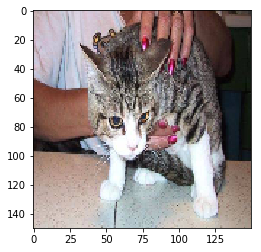

In [18]:
# display the first image as an example whose label is '0', ie. cat. 
plt.imshow(data_batch[0])

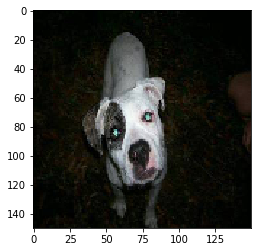

In [19]:
# display the second image as an example whose label is '1', ie. dog. 
plt.imshow(data_batch[1])

# 2. Building Binary Classifier using Convnet

## 2-1. [Option 1] : CNN model without Dropout

### 2-1-1. Building CNN Model

In [20]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,  activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

### 2-1-2. Model Compiling

In [19]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

### 2-1-3. Model Fitting

In [20]:
# Model Checkpoint Callback
callback_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model_option_1.h5', 
        monitor='val_loss', 
        save_best_only=True, )
]

### 2-1-4. Model training

In [21]:
hist = model.fit_generator(
    train_generator, 
    steps_per_epoch=30, # 20 * 30 = 600 samples
    epochs=50, 
    validation_data=validation_generator, 
    validation_steps=10,  # 20 * 10 = 200
    callbacks=callback_list
    )

Epoch 1/50
30/30 [==============================] - 5s 153ms/step - loss: 0.7009 - acc: 0.5233 - val_loss: 0.6930 - val_acc: 0.4900
Epoch 2/50
30/30 [==============================] - 2s 74ms/step - loss: 0.6935 - acc: 0.5133 - val_loss: 0.6918 - val_acc: 0.4900
Epoch 3/50
30/30 [==============================] - 2s 59ms/step - loss: 0.6952 - acc: 0.5083 - val_loss: 0.6869 - val_acc: 0.5300
Epoch 4/50
30/30 [==============================] - 2s 60ms/step - loss: 0.6893 - acc: 0.5433 - val_loss: 0.6865 - val_acc: 0.5300
Epoch 5/50
30/30 [==============================] - 2s 58ms/step - loss: 0.6900 - acc: 0.5650 - val_loss: 0.6896 - val_acc: 0.5200
Epoch 6/50
30/30 [==============================] - 2s 59ms/step - loss: 0.6778 - acc: 0.5683 - val_loss: 0.6808 - val_acc: 0.5800
Epoch 7/50
30/30 [==============================] - 2s 60ms/step - loss: 0.6493 - acc: 0.5917 - val_loss: 0.6831 - val_acc: 0.5850
Epoch 8/50
30/30 [==============================] - 2s 57ms/step - loss: 0.6462 - 

In [22]:
# save the model
model.save('model_option_1.h5')

### 2-1-5. Plotting of training, validation loss and accuracy

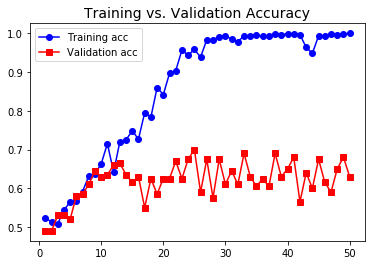

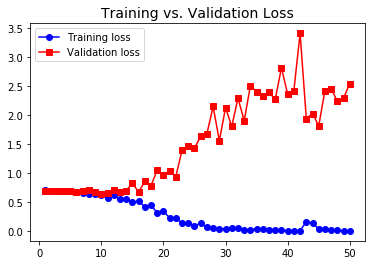

In [23]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo-', label='Training acc')
plt.plot(epochs, val_acc, 'rs-', label='Validation acc')
plt.title('Training vs. Validation Accuracy', fontsize=14)
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'rs-', label='Validation loss')
plt.title('Training vs. Validation Loss', fontsize=14)
plt.legend()

plt.show()

### 2-1-6. Model Evaluation

In [24]:
# load the model with lowest val_loss
from keras.models import load_model
model = load_model('model_option_1.h5')

In [25]:
# accuracy for test set
scores = model.evaluate_generator(test_generator, steps=10)
print("%s: %.2f"%(model.metrics_names[1], scores[1])) # accuracy

acc: 0.63


### 2-1-7. Prediction
- 20 samples (1 batch) from test set for example

In [26]:
for test_sample, test_label in test_generator:
    break

In [27]:
test_predicted = model.predict_classes(test_sample)

In [28]:
for i in range(20):
    print('Actual: ', test_label[i].astype('int'), 
          'vs. Predicted: ', test_predicted[i])

Actual:  0 vs. Predicted:  [0]
Actual:  0 vs. Predicted:  [0]
Actual:  1 vs. Predicted:  [0]
Actual:  1 vs. Predicted:  [0]
Actual:  1 vs. Predicted:  [0]
Actual:  0 vs. Predicted:  [0]
Actual:  0 vs. Predicted:  [0]
Actual:  1 vs. Predicted:  [1]
Actual:  1 vs. Predicted:  [1]
Actual:  1 vs. Predicted:  [0]
Actual:  1 vs. Predicted:  [1]
Actual:  1 vs. Predicted:  [0]
Actual:  0 vs. Predicted:  [0]
Actual:  0 vs. Predicted:  [1]
Actual:  0 vs. Predicted:  [1]
Actual:  0 vs. Predicted:  [1]
Actual:  1 vs. Predicted:  [0]
Actual:  1 vs. Predicted:  [1]
Actual:  1 vs. Predicted:  [1]
Actual:  1 vs. Predicted:  [1]


## 2-2. [Option 2] CNN with Dropout

### 2-2-1. Model Building

In [29]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5)) # for regularization
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5)) # for regularization
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # for regularization
model.add(layers.Dense(512,  activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 34, 34, 128)       512       
__________

### 2-2-2. Model Compileing

In [30]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

### 2-2-4. Model Fitting

In [31]:
# callback with Early Stopping and Model Check Point
callback_list = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=20, ), 
    
    keras.callbacks.ModelCheckpoint(
        filepath='model_option_2.h5', 
        monitor='val_loss', 
        save_best_only=True, )
]

In [32]:
hist = model.fit_generator(
    train_generator, 
    steps_per_epoch=30, # 20 * 30 = 600 samples
    epochs=50, 
    validation_data=validation_generator, 
    validation_steps=10,  # 20 * 10 = 200
    callbacks=callback_list
    )

Epoch 1/50
30/30 [==============================] - 2s 67ms/step - loss: 2.5814 - acc: 0.5517 - val_loss: 1.7128 - val_acc: 0.5650
Epoch 2/50
30/30 [==============================] - 2s 53ms/step - loss: 1.3923 - acc: 0.5883 - val_loss: 1.1505 - val_acc: 0.5450
Epoch 3/50
30/30 [==============================] - 2s 60ms/step - loss: 0.8527 - acc: 0.5883 - val_loss: 0.8830 - val_acc: 0.5900
Epoch 4/50
30/30 [==============================] - 2s 58ms/step - loss: 0.6908 - acc: 0.6350 - val_loss: 1.0095 - val_acc: 0.5550
Epoch 5/50
30/30 [==============================] - 2s 60ms/step - loss: 0.6474 - acc: 0.6433 - val_loss: 0.8656 - val_acc: 0.5800
Epoch 6/50
30/30 [==============================] - 2s 59ms/step - loss: 0.6040 - acc: 0.6850 - val_loss: 1.6090 - val_acc: 0.5900
Epoch 7/50
30/30 [==============================] - 2s 60ms/step - loss: 0.5971 - acc: 0.6800 - val_loss: 1.0565 - val_acc: 0.6000
Epoch 8/50
30/30 [==============================] - 2s 60ms/step - loss: 0.5961 - a

In [33]:
# save the model
#model.save('model_option_2.h5')

### 2-2-5. Plotting of training, validation loss and accuracy

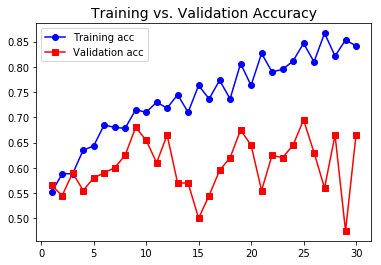

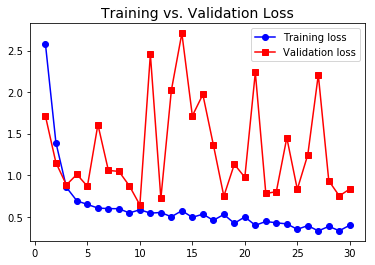

In [34]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo-', label='Training acc')
plt.plot(epochs, val_acc, 'rs-', label='Validation acc')
plt.title('Training vs. Validation Accuracy', fontsize=14)
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'rs-', label='Validation loss')
plt.title('Training vs. Validation Loss', fontsize=14)
plt.legend()

plt.show()

### 2-2-6. Model Evaluation

In [35]:
# load the model with lowest val_loss
model = load_model('model_option_2.h5')

In [36]:
# accuracy for test set
scores = model.evaluate_generator(test_generator, steps=10)
print("%s: %.2f"%(model.metrics_names[1], scores[1])) # accuracy

acc: 0.67


## 2-3. [Option 3] CNN with Dropout & Data Augmentation

### 2-3-1. Model Building

In [25]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5)) # for regularization
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5)) # for regularization
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # for regularization
model.add(layers.Dense(512,  activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 34, 34, 128)       512       
__________

### 2-3-2. Model compiling

In [26]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

### 2-3-3. Setting up a data augmentation configuration via ImageDataGenerator

In [27]:
datagen = ImageDataGenerator(
    rotation_range=30, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    shear_range=0.1, 
    zoom_range=0.1, 
    horizontal_flip=True, 
    fill_mode='nearest'
)

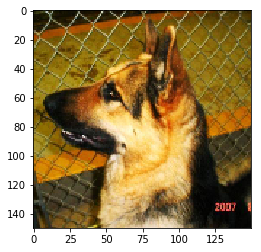

In [100]:
# Displaying some randomly augmented training images
from keras.preprocessing import image

fnames = [os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir)]

img_path = fnames[10] # choose one image to augment

# original image
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img) # converts it to a numpy array with shape(150, 150, 3)
x = x.reshape((1,) + x.shape) # shape(1, 150, 150, 3)
plt.imshow(image.array_to_img(x[0]))
plt.show()

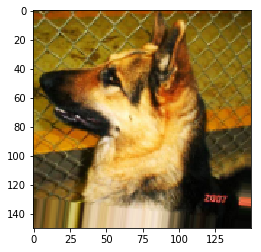

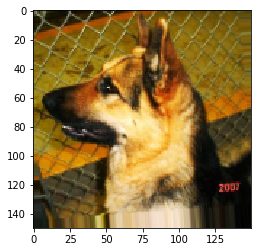

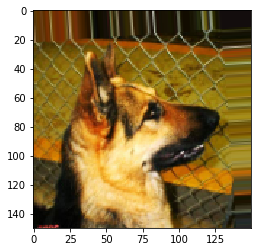

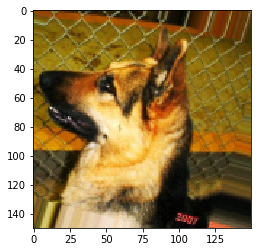

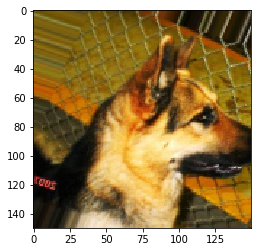

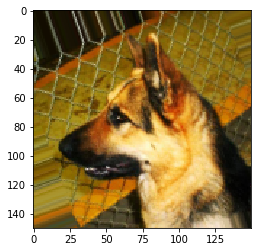

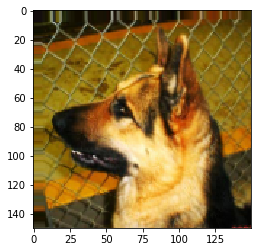

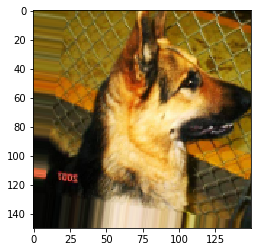

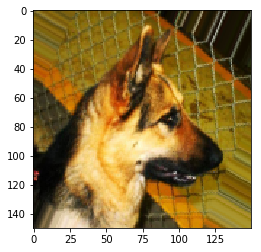

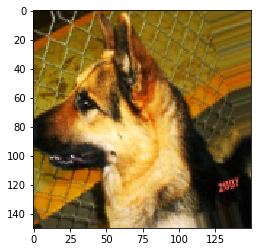

In [101]:
# Displaying some randomly augmented training images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i == 10:
        break
            
plt.show()

### 2-3-4. Training the convnet using data-augmentation generators

In [28]:
# callback with Early Stopping and Model Check Point
callback_list = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=40, ), 
    
    keras.callbacks.ModelCheckpoint(
        filepath='model_option_3.h5', 
        monitor='val_loss', 
        save_best_only=True, )
]

In [30]:
# Training data is augmented
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=45, 
    width_shift_range=0.25, 
    height_shift_range=0.25, 
    shear_range=0.25, 
    zoom_range=0.25, 
    horizontal_flip=True,)

# Validation data is not augmented
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    batch_size=32,
    class_mode='binary',
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='binary',
)

history = model.fit_generator(
    train_generator, 
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50, 
    callbacks=callback_list
)

Found 1200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 24s 244ms/step - loss: 0.7582 - acc: 0.5797 - val_loss: 0.7614 - val_acc: 0.5515
Epoch 2/100
100/100 [==============================] - 23s 226ms/step - loss: 0.6606 - acc: 0.5922 - val_loss: 1.7243 - val_acc: 0.5234
Epoch 3/100
100/100 [==============================] - 22s 221ms/step - loss: 0.6546 - acc: 0.6153 - val_loss: 0.6814 - val_acc: 0.5671
Epoch 4/100
100/100 [==============================] - 24s 243ms/step - loss: 0.6457 - acc: 0.6291 - val_loss: 0.8467 - val_acc: 0.5684
Epoch 5/100
100/100 [==============================] - 23s 227ms/step - loss: 0.6455 - acc: 0.6103 - val_loss: 0.7903 - val_acc: 0.5840
Epoch 6/100
100/100 [==============================] - 24s 242ms/step - loss: 0.6294 - acc: 0.6381 - val_loss: 0.7921 - val_acc: 0.6595
Epoch 7/100
100/100 [==============================] - 26s 261ms/step - loss: 0.6272 - acc: 0.6375 - 

### 2-3-5. Plotting the loss and accuracy of training and validation set

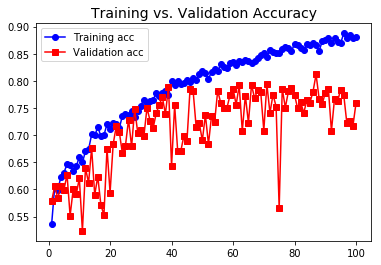

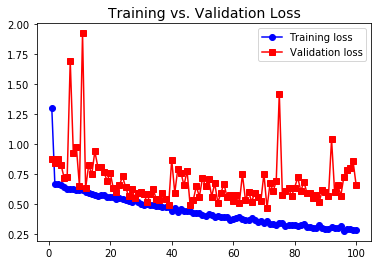

In [104]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo-', label='Training acc')
plt.plot(epochs, val_acc, 'rs-', label='Validation acc')
plt.title('Training vs. Validation Accuracy', fontsize=14)
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'rs-', label='Validation loss')
plt.title('Training vs. Validation Loss', fontsize=14)
plt.legend()

plt.show()

In [119]:
# load the model with lowest val_loss
model = load_model('model_option_3.h5')

In [120]:
# accuracy for test set
scores = model.evaluate_generator(test_generator, steps=10)
print("%s: %.2f"%(model.metrics_names[1], scores[1])) # accuracy

acc: 0.84


## 2-4. [Option 4] CNN with Dropout & Pretrained Network, but without Data Augmentation
> using VGG16 learned with ImageNet

### 2-4-1. Instantiating the VGG16 convolutional base

In [31]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  # not including the densely connected classifier on top of the network
                  include_top=False, 
                  input_shape=(150, 150, 3))

In [32]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

### 2-4-2. Extracting features using the pretrained convolutional base

In [108]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'C:/Users/admin/Downloads/dogs_cats_sample'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    
    generator = datagen.flow_from_directory(
        directory, 
        target_size=(150, 150), 
        batch_size=batch_size, 
        class_mode='binary')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch=conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [109]:
train_features, train_labels = extract_features(train_dir, 2000)

Found 1200 images belonging to 2 classes.


In [110]:
validation_features, validation_labels = extract_features(validation_dir, 1000)

Found 400 images belonging to 2 classes.


In [111]:
test_features, test_labels = extract_features(test_dir, 1000)

Found 400 images belonging to 2 classes.


In [112]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

### 2-4-3. Defining and training the densely connected classifier

In [113]:
# callback with Early Stopping and Model Check Point
callback_list = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=40, ), 
    
    keras.callbacks.ModelCheckpoint(
        filepath='model_option_4.h5', 
        monitor='val_loss', 
        save_best_only=True, )
]

In [114]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', 
             loss='binary_crossentropy', 
             metrics=['accuracy'])

history = model.fit(train_features, train_labels, 
                    epochs=30, 
                    batch_size=20, 
                    validation_data=(validation_features, validation_labels), 
                    callbacks=callback_list
                   )

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 668us/step - loss: 0.4240 - acc: 0.8115 - val_loss: 0.2649 - val_acc: 0.8930
Epoch 2/30
2000/2000 [==============================] - 1s 389us/step - loss: 0.2164 - acc: 0.9195 - val_loss: 0.2628 - val_acc: 0.8990
Epoch 3/30
2000/2000 [==============================] - 1s 389us/step - loss: 0.1402 - acc: 0.9520 - val_loss: 0.3483 - val_acc: 0.8690
Epoch 4/30
2000/2000 [==============================] - 1s 395us/step - loss: 0.0815 - acc: 0.9735 - val_loss: 0.2671 - val_acc: 0.9030
Epoch 5/30
2000/2000 [==============================] - 1s 392us/step - loss: 0.0633 - acc: 0.9815 - val_loss: 0.2828 - val_acc: 0.9080
Epoch 6/30
2000/2000 [==============================] - 1s 391us/step - loss: 0.0558 - acc: 0.9815 - val_loss: 0.2907 - val_acc: 0.9060
Epoch 7/30
2000/2000 [==============================] - 1s 396us/step - loss: 0.0407 - acc: 0.9865 - val_loss: 0.3308 - val_acc: 0.8880


### 2-4-4. Plotting the results

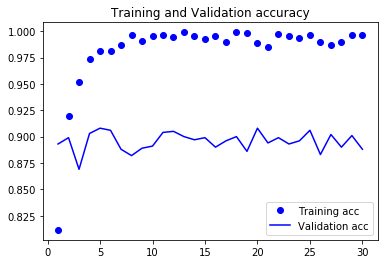

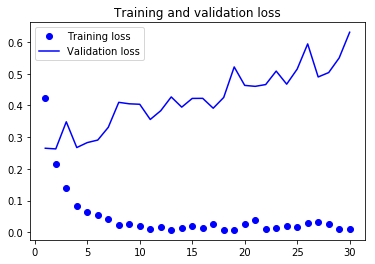

In [117]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 2-4-5. Model evaluation

In [121]:
# load the model with lowest val_loss
model = load_model('model_option_4.h5')

In [134]:
#accuracy for test set
scores = model.evaluate(test_features, test_labels, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 89.20%


## 2-5. [Option 5] CNN with Dropout, Pretrained Network & Data Augmentation
> using VGG16 learned with ImageNet

### 2-5-1. Adding a densely connected classifier on top of the convolutional base

In [135]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [136]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


### 2-5-2. Freeze a conv_base network, so only the weights from the two Dense layers are trained

In [137]:
conv_base.trainable = False

### 2-5-3. Training the model end to end with a frozen convolutional base

In [139]:
# callback with Early Stopping and Model Check Point
callback_list = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=40, ), 
    
    keras.callbacks.ModelCheckpoint(
        filepath='model_option_5.h5', 
        monitor='val_loss', 
        save_best_only=True, )
]

In [138]:
from keras.preprocessing.image import ImageDataGenerator

# data augmentation set-up
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=45, 
    width_shift_range=0.25, 
    height_shift_range=0.25, 
    shear_range=0.25, 
    zoom_range=0.25, 
    horizontal_flip=True,
    fill_mode='nearest'
)

# no data augmentation for validation, test set
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    batch_size=20, # 20*100 = 2,000 samples
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150), 
    batch_size=20, # 20*50 = 1,000 samples
    class_mode='binary'
)

Found 1200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [140]:
# model compiling
model.compile(loss='binary_crossentropy',  
              optimizer='adam', 
              metrics=['accuracy']
)

In [145]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=100, 
    epochs=100, 
    validation_data=validation_generator, 
    validation_steps=50, 
    callbacks=callback_list
)

Epoch 1/100
100/100 [==============================] - 17s 173ms/step - loss: 0.4342 - acc: 0.7960 - val_loss: 0.3071 - val_acc: 0.8750
Epoch 2/100
100/100 [==============================] - 16s 155ms/step - loss: 0.3918 - acc: 0.8130 - val_loss: 0.2825 - val_acc: 0.8910
Epoch 3/100
100/100 [==============================] - 15s 155ms/step - loss: 0.3481 - acc: 0.8425 - val_loss: 0.2999 - val_acc: 0.8790
Epoch 4/100
100/100 [==============================] - 16s 156ms/step - loss: 0.3804 - acc: 0.8245 - val_loss: 0.2613 - val_acc: 0.9040
Epoch 5/100
100/100 [==============================] - 16s 156ms/step - loss: 0.3380 - acc: 0.8490 - val_loss: 0.2623 - val_acc: 0.8930
Epoch 6/100
100/100 [==============================] - 16s 157ms/step - loss: 0.3235 - acc: 0.8585 - val_loss: 0.2577 - val_acc: 0.9090
Epoch 7/100
100/100 [==============================] - 16s 156ms/step - loss: 0.3277 - acc: 0.8515 - val_loss: 0.2646 - val_acc: 0.9060
Epoch 8/100
100/100 [===========================

### 2-5-4. Plotting of training and validation loss and accuracy

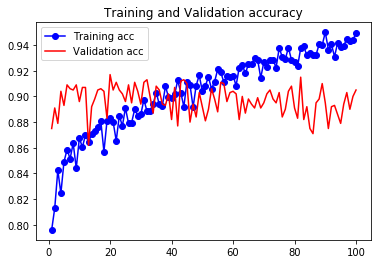

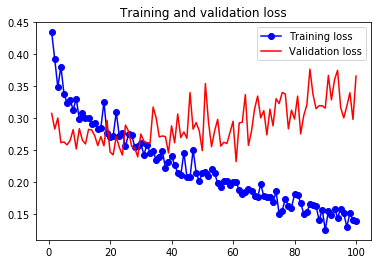

In [149]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo-', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [42]:
# load the model with lowest val_loss
model = load_model('model_option_5.h5')

C:\Users\admin\Anaconda3\envs\gpu\lib\site-packages\keras\engine\saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [43]:
# loss and accuracy for test set
scores = model.evaluate_generator(test_generator, steps=10)
print("%s: %.2f"%(model.metrics_names[1], scores[1])) # accuracy

acc: 0.93


## 2-5-5. Fine tuning the pretrained network

In [44]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [45]:
# freezing all layers up to a specific one
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [46]:
from keras.preprocessing.image import ImageDataGenerator

# callback with Early Stopping and Model Check Point
callback_list = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=40, ), 
    
    keras.callbacks.ModelCheckpoint(
        filepath='model_option_6.h5', 
        monitor='val_loss', 
        save_best_only=True, )
]

# data augmentation set-up
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=45, 
    width_shift_range=0.25, 
    height_shift_range=0.25, 
    shear_range=0.25, 
    zoom_range=0.25, 
    horizontal_flip=True,
    fill_mode='nearest'
)

# no data augmentation for validation, test set
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    batch_size=20, # 20*100 = 2,000 samples
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150), 
    batch_size=20, # 20*50 = 1,000 samples
    class_mode='binary'
)

# fine-tunn te model
from keras import optimizers
model.compile(loss='binary_crossentropy', 
             optimizer=optimizers.Adam(lr=1e-5), 
             metrics=['accuracy'])

history = model.fit_generator(
    train_generator, 
    steps_per_epoch=100, 
    epochs=100, 
    validation_data=validation_generator, 
    validation_steps=50, 
    callbacks=callback_list
)

Found 1200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 27s 275ms/step - loss: 0.2124 - acc: 0.9130 - val_loss: 0.3800 - val_acc: 0.8740
Epoch 2/100
100/100 [==============================] - 26s 258ms/step - loss: 0.1663 - acc: 0.9320 - val_loss: 0.2747 - val_acc: 0.9000
Epoch 3/100
100/100 [==============================] - 26s 258ms/step - loss: 0.1731 - acc: 0.9355 - val_loss: 0.2146 - val_acc: 0.9180
Epoch 4/100
100/100 [==============================] - 26s 261ms/step - loss: 0.1223 - acc: 0.9515 - val_loss: 0.2630 - val_acc: 0.9160
Epoch 5/100
100/100 [==============================] - 26s 261ms/step - loss: 0.1349 - acc: 0.9475 - val_loss: 0.1716 - val_acc: 0.9390
Epoch 6/100
100/100 [==============================] - 26s 261ms/step - loss: 0.1126 - acc: 0.9555 - val_loss: 0.1579 - val_acc: 0.9450
Epoch 7/100
100/100 [==============================] - 26s 262ms/step - loss: 0.0867 - acc: 0.9665 - 

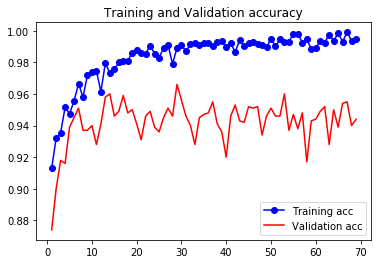

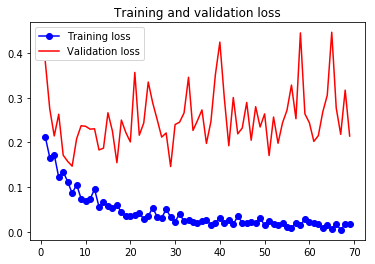

In [47]:
# plot the results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo-', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [48]:
# load the model with lowest val_loss
from keras.models import load_model
model = load_model('model_option_6.h5')

In [49]:
# loss and accuracy for test set
scores = model.evaluate_generator(test_generator, steps=10)
print("%s: %.2f"%(model.metrics_names[1], scores[1])) # accuracy

acc: 0.96


In [130]:
# plot of accuracy
test_accuracy = pd.DataFrame(
    {'method': ['base_reference', 
                'drop_out', 
                'data_augmentation', 
                'transfer_learning', 
                'all_together'], 
     'test_accuracy': [0.63, 0.67, 0.84, 0.89, 0.96]})

In [131]:
test_accuracy

,method,test_accuracy
0,base_reference,0.63
1,drop_out,0.67
2,data_augmentation,0.84
3,transfer_learning,0.89
4,all_together,0.96


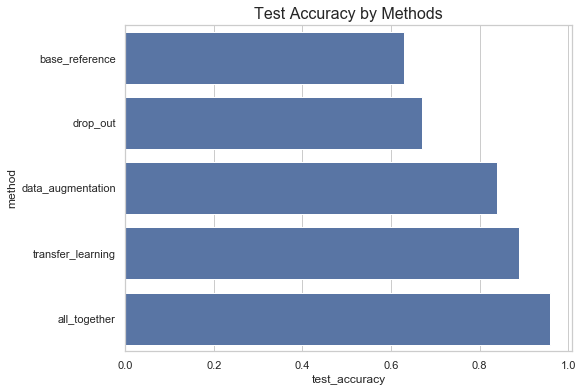

In [152]:
import seaborn as sns
sns.set(style="whitegrid")
#sns.set_color_codes("pastel")

plt.figure(figsize=(8, 6))
sns.barplot(y='method', 
            x='test_accuracy', 
            data=test_accuracy, 
            color="b")
plt.title('Test Accuracy by Methods', fontsize='16')
plt.show()

# - The End -